# Constant Pressure Simulation with Sensitivity Analysis

Code is ported (almost) verbatim from cantera example file `sensitivity1.py` (distributed with cantera):
```
"""
Constant-pressure, adiabatic kinetics simulation with sensitivity analysis
"""
```

In [1]:
import numpy as np
import cantera as ct

import matplotlib.pyplot as plt
%matplotlib notebook

### Problem Setup

In [2]:
gas = ct.Solution('gri30.xml')
temp = 1500.0
pres = ct.one_atm

gas.TPX = temp, pres, 'CH4:0.1, O2:2, N2:7.52'
r = ct.IdealGasConstPressureReactor(gas, name='R1')
sim = ct.ReactorNet([r])

# enable sensitivity with respect to the rates of the first 10
# reactions (reactions 0 through 9)
for i in range(10):
    r.add_sensitivity_reaction(i)

# set the tolerances for the solution and for the sensitivity coefficients
sim.rtol = 1.0e-6
sim.atol = 1.0e-15
sim.rtol_sensitivity = 1.0e-6
sim.atol_sensitivity = 1.0e-6

In [3]:
states = ct.SolutionArray(gas, extra=['t','s2','s3'])

for t in np.arange(0, 2e-3, 5e-6):
    sim.advance(t)
    s2 = sim.sensitivity('OH', 2) # sensitivity of OH to reaction 2
    s3 = sim.sensitivity('OH', 3) # sensitivity of OH to reaction 3
    states.append(r.thermo.state, t=1000*t, s2=s2, s3=s3)

    print('%10.3e %10.3f %10.3f %14.6e %10.3f %10.3f' %
          (sim.time, r.T, r.thermo.P, r.thermo.u, s2, s3))

 0.000e+00   1500.000 101325.000   9.070304e+05      0.000      0.000
 5.000e-06   1500.000 101325.000   9.070306e+05     -0.000      0.000
 1.000e-05   1499.999 101325.000   9.070307e+05      0.000      0.000
 1.500e-05   1499.999 101325.000   9.070308e+05      0.000      0.000
 2.000e-05   1499.998 101325.000   9.070309e+05      0.000      0.000
 2.500e-05   1499.998 101325.000   9.070310e+05      0.000      0.000
 3.000e-05   1499.997 101325.000   9.070311e+05      0.000      0.000
 3.500e-05   1499.997 101325.000   9.070312e+05      0.000      0.000
 4.000e-05   1499.997 101325.000   9.070313e+05      0.000      0.000
 4.500e-05   1499.996 101325.000   9.070314e+05      0.000     -0.000
 5.000e-05   1499.996 101325.000   9.070315e+05      0.000     -0.000
 5.500e-05   1499.996 101325.000   9.070316e+05      0.000     -0.000
 6.000e-05   1499.995 101325.000   9.070317e+05      0.000     -0.000
 6.500e-05   1499.995 101325.000   9.070317e+05      0.000     -0.000
 7.000e-05   1499.99

### Results

<IPython.core.display.Javascript object>


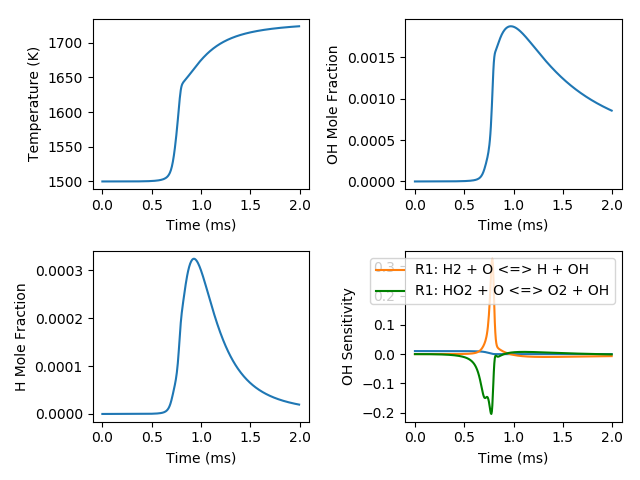

In [4]:
plt.subplot(2,2,1)
plt.plot(states.t, states.T)
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.subplot(2,2,2)
plt.plot(states.t, states('OH').X)
plt.xlabel('Time (ms)')
plt.ylabel('OH Mole Fraction')
plt.subplot(2,2,3)
plt.plot(states.t, states('H').X)
plt.xlabel('Time (ms)')
plt.ylabel('H Mole Fraction')
plt.subplot(2,2,4)
plt.plot(states.t, states('CH4').X)
plt.xlabel('Time (ms)')
plt.ylabel('CH4 Mole Fraction')
plt.tight_layout()

In [5]:
l2 = plt.plot(states.t, states.s2, '-', label=sim.sensitivity_parameter_name(2))
l3 = plt.plot(states.t, states.s3, '-g', label=sim.sensitivity_parameter_name(3))
plt.legend(loc='best',handles=l2+l3)
plt.xlabel('Time (ms)')
plt.ylabel('OH Sensitivity')
plt.tight_layout()